# 梯度下降法求解sqrt(v)

凑出predict - gt这个形式 
$$loss = (x^2 - v)^2$$
我们的目标是将loss降为0 <br>
这恰好满足了梯度下降法的目标



In [1]:
v = 2
x = v/2  # 随意给一个初始值
lr = 0.01  # 定义学习率
loss = 1  # 定义loss，在这个语境下就是学习率
niter = 0     

while loss > 1e-8:
    niter += 1
    
    predict = x**2
    loss = 0.5*(x**2 - v)**2
    
    del_predict = x**2 - v
    del_x = 2*(del_predict)
    
    x = x - lr * del_x
#     print(loss)
    print(x)

x, f"{niter}"

1.02
1.0391920000000001
1.0575935997427202
1.075223515298385
1.0921014031413725
1.1082476936465053
1.1236834346370494
1.1384301454114951
1.1525096814918623
1.1659441101732129
1.1787555968122607
1.190966301671936
1.2025982870375735
1.2136734342378594
1.224213370138365
1.2342394026258543
1.2437724645659698
1.2528330656937197
1.2614412518838092
1.2696165712447254
1.2773780464851412
1.2847441530122974
1.2917328022383117
1.2983613295907428
1.30464648674721
1.3106044376395733
1.3162507578003626
1.321600436652162
1.3266678823689784
1.3314669289667906
1.3360108453081454
1.3403123457325257
1.3443836020500652
1.348236256660843
1.3518814365853462
1.355329768213665
1.3585913926015427
1.3616759811605228
1.3645927516071334
1.367350484052359
1.3699575371275945
1.3724218640569403
1.3747510285981097
1.3769522207854785
1.3790322724189572
1.3809976722514974
1.3828545808362163
1.3846088450014222
1.3862660119282988
1.387831342811747
1.389309826089934
1.390706190232533
1.3920249160815112
1.3932702487416764


(1.4141668914783248, '159')

收敛性证明：导数和学习率要匹配 （感兴趣可以去了解一下）

# 最小二乘法求仿射矩阵

 $$
 a^{'}_{x} = a_{x}m_{00}+a_{y}m_{01}+m_{02}
$$
$$
 a^{'}_{y} = a_{x}m_{10}+a_{y}m_{11}+m_{12}
$$
   
$$
 b^{'}_{x} = b_{x}m_{00}+b_{y}m_{01}+m_{02}
$$
$$
 b^{'}_{y} = b_{x}m_{10}+b_{y}m_{11}+m_{12}
$$
   
$$
 c^{'}_{x} = c_{x}m_{00}+c_{y}m_{01}+m_{02}
$$
$$
 c^{'}_{y} = c_{x}m_{10}+c_{y}m_{11}+m_{12}
$$

* （由于是乘加）问题转换为矩阵乘法，提取出其中的系数部分

* latex 和 markdown的使用
$$
\begin{gathered}
\begin{bmatrix} 
a_x & a_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & a_x & a_y & 1 \\
b_x & b_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & b_x & b_y & 1 \\
c_x & c_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & c_x & c_y & 1 \\
\end{bmatrix}
\begin{bmatrix} 
m_{00} \\
m_{01} \\
m_{02} \\
m_{10} \\
m_{11} \\
m_{12} \\
\end{bmatrix}
=
\begin{bmatrix} 
a'_x \\
a'_y \\
b'_x \\
b'_y \\
c'_x \\
c'_y \\
\end{bmatrix}
\end{gathered}
$$
* 其中
$$A = \begin{bmatrix}
a_x & a_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & a_x & a_y & 1 \\
b_x & b_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & b_x & b_y & 1 \\
c_x & c_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & c_x & c_y & 1 
\end{bmatrix}
\quad
M = 
\begin{bmatrix} 
m_{00} \\
m_{01} \\
m_{02} \\
m_{10} \\
m_{11} \\
m_{12} \\
\end{bmatrix}
\quad
B = \begin{bmatrix} 
a'_x \\
a'_y \\
b'_x \\
b'_y \\
c'_x \\
c'_y \\
\end{bmatrix}$$

* 定义最小二乘法
$$ argmin||AM - B||_{2}^2 $$
$$ M = (A^T A) ^{-1}A^TB $$

In [2]:
import numpy as np
A = [
    [0, 0],
    [50, 0],
    [50,50]
]

B = [
    [30, 30],
    [130, 30],
    [130, 130]
]

(ax, ay), (bx, by), (cx, cy) = A[0], A[1], A[2]
(dst_ax, dst_ay), (dst_bx, dst_by), (dst_cx, dst_cy) = B[0], B[1], B[2]

A = np.array([[ax, ay, 1, 0, 0, 0],
    [0, 0,   0, ax, ay, 1],
    [bx, by, 1, 0, 0, 0],
    [0, 0,   0, bx, by, 1],
    [cx, cy, 1, 0, 0, 0],
    [0, 0,   0, cx, cy, 1]
])

B = np.array([
    dst_ax,
    dst_ay,
    dst_bx,
    dst_by,
    dst_cx,
    dst_cy
]).reshape(6,1)

M = np.linalg.inv(A.T@A)@A.T@B # linear algebra
M.reshape(2,3)

array([[ 2.,  0., 30.],
       [ 0.,  2., 30.]])

In [3]:
# 准备数据

A = [
    [0,0],
    [50,0],
    [50,50]
]

B = [
    [30, 30],
    [130, 30],
    [130, 130]
]


(ax,   ay), (bx,   by), (cx,   cy) = A[0], A[1], A[2]
(dax, day), (dbx, dby), (dcx, dcy) = B[0], B[1], B[2]


X = np.array([
    [ax, ay, 1, 0,  0,  0],
    [0,  0,  0, ax, ay, 1],
    [bx, by, 1, 0,  0,  0],
    [0,  0,  0, bx, by, 1],
    [cx, cy, 1, 0,  0,  0],
    [0,  0,  0, cx, cy, 1]
])

Y = np.array([
    dax,
    day,
    dbx,
    dby,
    dcx,
    dcy
]).reshape(6, 1)

# 权重初始化和其他变量的初始化
theta = np.random.normal(size = (6,1)) # kp: weight init
lr = 3e-4

# kp: Learning schedule 
schedule = {
    20000: 1e-5,
    28000: 1e-6
}


for i in range(30000):
    if i in schedule:
        lr = schedule[i]
        print(f"set lr = {lr}")
        
    predict = X @ theta
    loss = 0.5 * np.sum((predict - Y)**2)
    
    if i % 3000 == 0:
        print(f"iter {i} loss = {loss:g}")

    # 矩阵求导 del_B = A^T @ G
    del_t = X.T @ (predict - Y)
    theta = theta - lr * del_t
    
np.round(theta.reshape(2,3)) # round四舍五入

iter 0 loss = 42647.7
iter 3000 loss = 154.223
iter 6000 loss = 25.5044
iter 9000 loss = 4.21775
iter 12000 loss = 0.697502
iter 15000 loss = 0.115348
iter 18000 loss = 0.0190755
set lr = 1e-05
iter 21000 loss = 0.00563341
iter 24000 loss = 0.00530547
iter 27000 loss = 0.00499662
set lr = 1e-06


array([[ 2., -0., 30.],
       [ 0.,  2., 30.]])

# 我们得到的affine matrix 能够干什么呢？

kj shape (270, 283, 3)


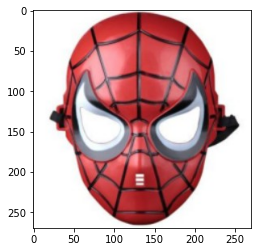

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
kj_img = cv2.imread("kj.jpg") # (270, 283, 3)  bgr
mask_img = cv2.imread("spider_man.jpg")
plt.imshow(kj_img[...,::-1])  # bgr --> rgb to show
print("kj shape", kj_img.shape)
plt.imshow(mask_img[...,::-1])


## 求出坐标映射的变换矩阵

In [12]:
# 现在我们要做什么呢？
# 我们要把mask 弄到狗的脸上，眼睛对眼睛，嘴巴对嘴巴
# mask points
A = [    
    [59, 112], # xy
    [140,112],
    [96, 161]
]

# kj points
B = [
    [160, 61],
    [212, 107],
    [141, 134]
]

(ax,   ay), (bx,   by), (cx,   cy) = A[0], A[1], A[2]
(dax, day), (dbx, dby), (dcx, dcy) = B[0], B[1], B[2]

A = np.array([
    [ax, ay, 1, 0,  0,  0],
    [0,  0,  0, ax, ay, 1],
    [bx, by, 1, 0,  0,  0],
    [0,  0,  0, bx, by, 1],
    [cx, cy, 1, 0,  0,  0],
    [0,  0,  0, cx, cy, 1]
])

B = np.array([
    dax,
    day,
    dbx,
    dby,
    dcx,
    dcy
]).reshape(6, 1)

M = np.linalg.inv(A.T @ A) @ A.T @ B
M = M.reshape(2, 3)
M

array([[  0.64197531,  -0.87251197, 219.84479718],
       [  0.56790123,   1.06097254, -91.335097  ]])

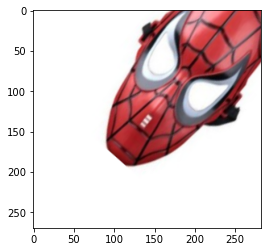

In [13]:
# 看看mask被变换后成什么样子
kj_img = cv2.imread("kj.jpg") # (270, 283, 3)  bgr
mask_img = cv2.imread("spider_man.jpg")

kj_h, kj_w, _ = kj_img.shape  # hwc
out_mask = cv2.warpAffine(mask_img, M, (kj_w, kj_h), borderValue= (255,255,255))
plt.imshow(out_mask[...,::-1])

## 对每个像素计算权重

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

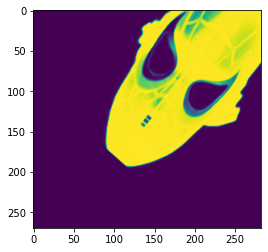

In [22]:
# 接着我们将它扣除抠出来，对于这个简单的图来说，我们只要去掉白色的地方即可。 像素值与白色做对比，越小则越是白色 
weight = np.abs(out_mask / 255 - 1)
weight = np.fmax(weight[...,0], weight[...,1], weight[...,2]) # 取每个通道的最大值  ref: https://numpy.org/doc/stable/reference/generated/numpy.fmax.html
# 变换权重来 加强/减弱某点的原始权重， 如果该点权重小于0.3，则让它趋近于0，如果大于0.3，让它大于零
weight = sigmoid((weight - 0.3) * 10)
weight = weight.reshape(*weight.shape, 1) # 1--> 为了要plt.imshow
plt.imshow(weight[...,0])

## 合并 

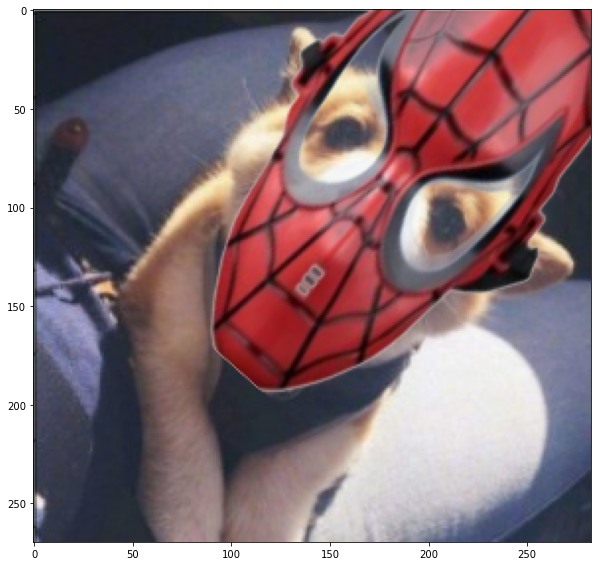

In [25]:
merge = (weight * out_mask + kj_img * (1 - weight)).astype(np.uint8) # 合并mask和kj图像，weight是mask的权重
plt.figure(figsize=(10,10))
plt.imshow(merge[...,::-1])

# 作业
0. 写逻辑回归代码和理论的笔记!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
1. 预习bp内容 !!!!!!!!!!!!!! (看看吴恩达的，或者看看一些推导）
2. 了解mnist任务 !!!!! （比如大小，训练集有多少，测试集有多少等等）
3. 了解labelsmoothing!!
4. 了解softmax的原理 !!!!!!，
5. 了解SGD, SGD momumtum 和 Adam !!!!! ref: https://towardsdatascience.com/learning-parameters-part-1-eb3e8bb9ffbb 如果找不到它的一系列请告知我， 如果看得懂的话，主要搞清楚它每一个优化器的演变，为什么要做这样的改进
6. 了解weight decay
7. sigmoid 和 交叉熵一起的求导
8. 思考sigmoid是否有值得改进，sigmoid(-100000000000), sigmoid(10000000000000000000000) 会出现什么问题，如何避免